In [47]:
import requests as r
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'https://www.sec.gov/cgi-bin/own-disp?action=getissuer&CIK=0000012927'
response = r.get(url)
response

<Response [200]>

In [4]:
html = BeautifulSoup(response.text, 'html.parser')

In [29]:
table = html.find(id='transaction-report')
table

<table border="0" cellspacing="0" id="transaction-report">
<tr align="left" class="header" valign="top">
<th align="center" class="sm">Acquistion or Disposition</th>
<th align="center" class="sm">Transaction Date</th>
<th align="center" class="sm">Deemed Execution Date</th>
<th align="left" class="sm" valign="top" width="40%">Reporting Owner</th>
<th align="left" class="sm">Form</th>
<th align="left" class="sm"><a href="/opa/column-descriptions.html" target="_blank"><b>Transaction Type</b></a></th>
<th align="center" class="sm">Direct or Indirect Ownership</th>
<th align="center" class="sm">Number of Securities Transacted</th>
<th align="center" class="sm">Number of Securities Owned</th>
<th align="center" class="sm">Line Number</th>
<th align="left" class="sm">Owner CIK</th>
<th align="left" class="sm" width="30%">Security Name</th>
</tr>
<tr bgcolor="#FFE0E0" valign="top">
<td align="center">D</td>
<td nowrap="">2020-03-06</td>
<td nowrap="nowrap"> </td>
<td width="40%">Arthur Michae

In [25]:
for item in html.select('table'):
    try:
        if item['id'] == 'transaction-report':
            tableDF = pd.read_html(item.text)
    except KeyError:
        pass
if tableDF:
    tableDF

ValueError: No tables found

In [38]:
#tableDF = pd.read_html(url, match='transaction-report')
#tableDF = pd.read_html(url)
tableDF = pd.read_html(url, attrs = {'id': 'transaction-report'})
tableDF = tableDF[0]
tableDF

,Acquistion or Disposition,Transaction Date,Deemed Execution Date,Reporting Owner,Form,Transaction Type,Direct or Indirect Ownership,Number of Securities Transacted,Number of Securities Owned,Line Number,Owner CIK,Security Name
0,D,2020-03-06,NaN,Arthur Michael A.,4,D-Return,--D,22.72,4122.40,2,1770619,Common Stock
1,A,2020-03-06,NaN,Arthur Michael A.,4,M-Exempt,--D,22.72,4145.12,1,1770619,Common Stock
2,D,2020-03-06,NaN,Verbeck Robert E,4,F-InKind,--D,14.03,10747.38,1,1604570,Common Stock
3,D,2020-03-06,NaN,Smith Gregory D,4,F-InKind,--D,52.23,154187.36,1,1484277,Common Stock
4,D,2020-03-06,NaN,Sands Diana L,4,F-InKind,--D,18.45,20550.45,1,1540790,Common Stock
...,...,...,...,...,...,...,...,...,...,...,...,...
75,A,2020-01-02,NaN,WILLIAMS RONALD A,4,A-Award,--D,268.51,18287.37,1,1185243,Phantom Stock Units
76,A,2020-01-02,NaN,LIDDY EDWARD M,4,A-Award,--D,151.27,22636.77,1,1188983,Phantom Stock Units
77,A,2020-01-02,NaN,KENNEDY CAROLINE B,4,A-Award,--D,151.27,1571.15,1,1714622,Phantom Stock Units
78,A,2020-01-02,NaN,Haley Nikki R,4,A-Award,--D,253.38,624.15,1,1769426,Phantom Stock Units


/home/nickludwig/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


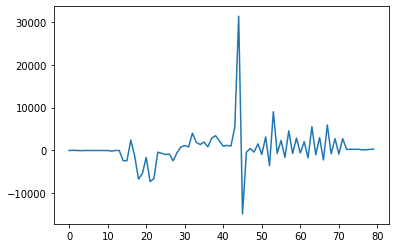

In [40]:
sale = tableDF['Acquistion or Disposition'] == 'D'
transaction = tableDF['Number of Securities Transacted']
transaction[sale] *= -1. #buys > 0; sales < 0
plt.plot([i for i in range(len(transaction))], transaction)
plt.show()

In [42]:
url = 'https://www.sec.gov/cgi-bin/own-disp?action=getowner&CIK=0001484277'
tableDF = pd.read_html(url, attrs = {'id': 'transaction-report'})[0]

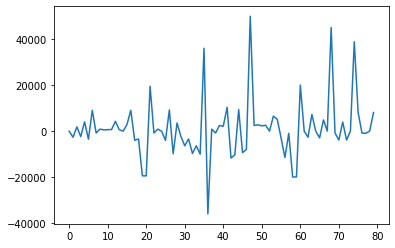

In [43]:
sale = tableDF['Acquistion or Disposition'] == 'D'
transaction = tableDF['Number of Securities Transacted'].copy()
transaction[sale] *= -1. #buys > 0; sales < 0
plt.plot([i for i in range(len(transaction))], transaction)
plt.show()

In [45]:
response = r.get(url)
html = BeautifulSoup(response.text, 'html.parser')
button = html.find(type='button')

In [46]:
button

<input onclick="parent.location='/cgi-bin/own-disp?action=getowner&amp;CIK=0001484277&amp;type=&amp;dateb=&amp;owner=include&amp;start=80'" type="button" value="Next 80"/>